In [1]:
import requests
import pandas as pd

# Importing HPI data and Vaccine data
voter_data = requests.get('https://api.healthyplacesindex.org/api/hpi?geography=tracts&year=2020&indicator=voting&format=json&key=f07f86d6-58b5-40e3-a17f-333b92ccc57d').json()
vaccine_data = requests.get('https://data.sandiegocounty.gov/resource/nrkb-eanb.json').json()

# voter_data
# vaccine_data

# Converting data (python dictionary) to a pandas dataframe
# Resetting titles (variables) the dataframe versions
voter_data = pd.DataFrame(voter_data)
voter_data['geoid'] = voter_data['geoid'].str[1:].astype({'geoid':'int64'})

vaccine_data = pd.DataFrame(vaccine_data)

voter_data.head()

,geoid,name,population,value,percentile,numerator,denominator
0,6013370000,3700,2850,0.848177,0.726187,1805.769339,2129
1,6001442301,4423.01,5496,0.798606,0.526829,1810.439877,2267
2,6037405101,4051.01,5617,0.690015,0.213864,1783.000000,2584
3,6037199800,1998,5828,0.650465,0.121309,1539.000000,2366
4,6037291300,2913,3037,0.764853,0.406932,1383.619048,1809


In [2]:
# Converting Vaccine Data column to float
vaccine_data['vaccination_percentage_all'] = pd.to_numeric(vaccine_data['vaccination_percentage_all'])
# vaccine_data.dtypes

# Creating a function to popuilated a column
import numpy as np

def Vaccine_Quartile (vaccination_percentage_all):
    if vaccination_percentage_all <= 25:
        return 'Q1'
    elif vaccination_percentage_all <= 50:
        return 'Q2'
    elif vaccination_percentage_all <= 75:
        return 'Q3'
    elif vaccination_percentage_all <= 100:
        return 'Q4'
    else:
        return 'Unknown'
    
vaccine_data['Vaccine Quartile'] = vaccine_data.apply(lambda row: Vaccine_Quartile(row['vaccination_percentage_all']), axis=1)

vaccine_data.head(2)

,the_geom,objectid,census_tract,count_vaccinated,gis_hpi_quartile_sd,doses_through,update_date,shape_length,shape_area,globalid,vaccination_percentage_all,censuspop_all,notes,censuspop_16plus,vaccination_percentage,censuspop_5plus,vaccination_percentage_5plus,censuspop_12plus,vaccination_percentage_12plus,Vaccine Quartile
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",52148,27.09,2611,1,2022-07-25T08:00:00.000Z,2022-07-27T08:00:00.000Z,4542.22806061985,863204.6140417,{7180F893-7DCF-42C7-9C81-170B0BE32E62},71.338798,3660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q3
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",51876,120.02,2838,1,2022-07-25T08:00:00.000Z,2022-07-27T08:00:00.000Z,4580.147408856571,793645.91325221,{8A80FD90-06C3-476C-845B-A231A626E0FE},74.566474,3806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q3


In [3]:
#Import from Google Drive - Master HPI Data. Recieved this file directly from the HPI agency. 
# Will use this file as an intermidiary- common key is needed from this file to join HPI data and Vaccine data

import pandas as pd

url='https://drive.google.com/file/d/1-O5aXOkgAaQUxMjZ5EXu9y6kHxmjsyp2/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
master_hpi = pd.read_csv(path)

master_hpi = pd.DataFrame(master_hpi)

#Cleaning/Filtering mster HPI data. Preparing to join. 
# san_diego_hpi = master_hpi[master_hpi['county']=='San Diego']
san_diego_hpi = master_hpi[master_hpi['county']=='San Diego']


san_diego_hpi['NAME'] = [x.split(',')[-0] for x in san_diego_hpi['NAME']]

san_diego_hpi['NAME'] = [x.split('Tract ')[-1] for x in san_diego_hpi['NAME']]

san_diego_hpi.head(2)


C:\Users\krist\AppData\Local\Temp\ipykernel_42664\762238062.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  san_diego_hpi['NAME'] = [x.split(',')[-0] for x in san_diego_hpi['NAME']]
C:\Users\krist\AppData\Local\Temp\ipykernel_42664\762238062.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  san_diego_hpi['NAME'] = [x.split('Tract ')[-1] for x in san_diego_hpi['NAME']]


,GEO_ID,NAME,county,pop,pctgqtract,UrbanType,LEB,LEB_pctile,hpi,hpi_pctile,...,latino_pct,white_pct,black_pct,asian_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version,notes
5658,6073000100,1,San Diego,3093,0.0,urban_area,88.0,0.990436,1.048395,0.975995,...,0.158,0.772,0.000,0.036,0.033,0.000,0.0,0.0,2/10/2022,NaN
5659,6073000201,2.01,San Diego,1891,0.0,urban_area,83.7,0.851155,0.698384,0.884339,...,0.074,0.830,0.005,0.040,0.045,0.006,0.0,0.0,2/10/2022,NaN


In [4]:
# Joining datasets
#san diego hpi: vaccine data

sdhpi_vaccine_join = pd.merge(san_diego_hpi[['voting','voting_pctile','NAME','GEO_ID','county','pop','hpi_pctile','hpi_quartile','hpi_least_healthy_25pct','economic_pctile']], vaccine_data[['census_tract','gis_hpi_quartile_sd', 'vaccination_percentage_all','Vaccine Quartile', 'update_date']], left_on='NAME', right_on='census_tract', how='left')

sdhpi_vaccine_join.sort_values('vaccination_percentage_all', ascending=False).drop_duplicates(['voting','voting_pctile','NAME','GEO_ID','county','pop','hpi_pctile','hpi_quartile','hpi_least_healthy_25pct','economic_pctile','census_tract','gis_hpi_quartile_sd', 'Vaccine Quartile']).sort_index()
# test_join[test_join['census_tract'] == '170.19' ]

# sdhpi_vaccine_join

# voter_data.head(2)


,voting,voting_pctile,NAME,GEO_ID,county,pop,hpi_pctile,hpi_quartile,hpi_least_healthy_25pct,economic_pctile,census_tract,gis_hpi_quartile_sd,vaccination_percentage_all,Vaccine Quartile,update_date
0,0.924053,0.994865,1,6073000100,San Diego,3093,0.975995,4.0,No,0.971759,1,4,86.387274,Q4,2022-07-27T08:00:00.000Z
1,0.910670,0.977664,2.01,6073000201,San Diego,1891,0.884339,4.0,No,0.850578,2.01,4,76.140808,Q4,2022-07-27T08:00:00.000Z
4,0.895648,0.927599,2.02,6073000202,San Diego,4542,0.783440,4.0,No,0.894737,2.02,4,69.637027,Q3,2022-08-03T08:00:00.000Z
5,0.882855,0.879076,3,6073000300,San Diego,5239,0.860591,4.0,No,0.826059,3,4,87.697715,Q4,2022-07-27T08:00:00.000Z
7,0.867249,0.811425,4,6073000400,San Diego,3801,0.872272,4.0,No,0.794095,4,4,92.747784,Q4,2022-07-27T08:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,0.888528,0.899487,218,6073021800,San Diego,2403,0.868036,4.0,No,0.921566,218,4,94.915254,Q4,2022-07-27T08:00:00.000Z
980,NaN,NaN,219,6073021900,San Diego,7107,NaN,NaN,NaN,NaN,219,NaN,40.137970,Q2,2022-08-31T08:00:00.000Z
982,0.680180,0.187548,220,6073022000,San Diego,4681,0.230424,1.0,Yes,0.272144,220,1,83.843498,Q4,2022-08-03T08:00:00.000Z
983,0.895080,0.925160,221,6073022100,San Diego,10005,0.791656,4.0,No,0.716431,221,4,79.802020,Q4,2022-07-27T08:00:00.000Z


In [5]:
# Merging all 3 datasets together
three_set_join = pd.merge(sdhpi_vaccine_join[['voting','voting_pctile','NAME','GEO_ID','county','pop','hpi_pctile','hpi_quartile','hpi_least_healthy_25pct','economic_pctile','census_tract','gis_hpi_quartile_sd', 'vaccination_percentage_all','Vaccine Quartile']],voter_data[['geoid','name','population','value', 'percentile']], left_on='GEO_ID', right_on='geoid', how='left')
three_set_join


,voting,voting_pctile,NAME,GEO_ID,county,pop,hpi_pctile,hpi_quartile,hpi_least_healthy_25pct,economic_pctile,census_tract,gis_hpi_quartile_sd,vaccination_percentage_all,Vaccine Quartile,geoid,name,population,value,percentile
0,0.924053,0.994865,1,6073000100,San Diego,3093,0.975995,4.0,No,0.971759,1,4,86.387274,Q4,6.073000e+09,1,3093.0,0.924053,0.994865
1,0.910670,0.977664,2.01,6073000201,San Diego,1891,0.884339,4.0,No,0.850578,2.01,4,76.140808,Q4,6.073000e+09,2.01,1891.0,0.910670,0.977664
2,0.910670,0.977664,2.01,6073000201,San Diego,1891,0.884339,4.0,No,0.850578,2.01,4,76.140808,Q4,6.073000e+09,2.01,1891.0,0.910670,0.977664
3,0.895648,0.927599,2.02,6073000202,San Diego,4542,0.783440,4.0,No,0.894737,2.02,4,69.598617,Q3,6.073000e+09,2.02,4542.0,0.895648,0.927599
4,0.895648,0.927599,2.02,6073000202,San Diego,4542,0.783440,4.0,No,0.894737,2.02,4,69.637027,Q3,6.073000e+09,2.02,4542.0,0.895648,0.927599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0.680180,0.187548,220,6073022000,San Diego,4681,0.230424,1.0,Yes,0.272144,220,1,83.682394,Q4,6.073022e+09,220,4681.0,0.680180,0.187548
982,0.680180,0.187548,220,6073022000,San Diego,4681,0.230424,1.0,Yes,0.272144,220,1,83.843498,Q4,6.073022e+09,220,4681.0,0.680180,0.187548
983,0.895080,0.925160,221,6073022100,San Diego,10005,0.791656,4.0,No,0.716431,221,4,79.802020,Q4,6.073022e+09,221,10005.0,0.895080,0.925160
984,0.895080,0.925160,221,6073022100,San Diego,10005,0.791656,4.0,No,0.716431,221,4,79.752025,Q4,6.073022e+09,221,10005.0,0.895080,0.925160


In [6]:
# Selected Columns - Reduced to specific columns
select_df = three_set_join[['voting', 'voting_pctile', 'GEO_ID', 'hpi_pctile', 'hpi_quartile','Vaccine Quartile', 'vaccination_percentage_all']]
select_df

,voting,voting_pctile,GEO_ID,hpi_pctile,hpi_quartile,Vaccine Quartile,vaccination_percentage_all
0,0.924053,0.994865,6073000100,0.975995,4.0,Q4,86.387274
1,0.910670,0.977664,6073000201,0.884339,4.0,Q4,76.140808
2,0.910670,0.977664,6073000201,0.884339,4.0,Q4,76.140808
3,0.895648,0.927599,6073000202,0.783440,4.0,Q3,69.598617
4,0.895648,0.927599,6073000202,0.783440,4.0,Q3,69.637027
...,...,...,...,...,...,...,...
981,0.680180,0.187548,6073022000,0.230424,1.0,Q4,83.682394
982,0.680180,0.187548,6073022000,0.230424,1.0,Q4,83.843498
983,0.895080,0.925160,6073022100,0.791656,4.0,Q4,79.802020
984,0.895080,0.925160,6073022100,0.791656,4.0,Q4,79.752025


In [7]:
# Writing to CSV files for all three datasets

from pathlib import Path 

# Export of Filtered San Diego HPI data (sample size) - Accessed via API
export_sdhpi = san_diego_hpi.head(10)
filepath = Path('C:/Users/krist/Downloads/DSCI-510-Final-Project/san_diego_hpi_sample.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
export_sdhpi.to_csv(filepath)


# Export of vaccine data (sample size) - accessed via json import
export_v = vaccine_data.head(10)
filepath = Path('C:/Users/krist/Downloads/DSCI-510-Final-Project/vaccine_data_sample.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
export_v.to_csv(filepath)

# Export of Master HPI data - reading from a Google Drive folder
export_master = vaccine_data.head(10)
filepath = Path('C:/Users/krist/Downloads/DSCI-510-Final-Project/master_data_sample.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
export_master.to_csv(filepath)

#Export of merged dataset of above three imported datasets
export_three_set = three_set_join
filepath_joined = Path('C:/Users/krist/Downloads/DSCI-510-Final-Project/Resulting Joined Data.csv')
filepath_joined.parent.mkdir(parents=True, exist_ok=True)
export_three_set.to_csv(filepath_joined)

In [7]:
# Pie Chart Visual using calculated column : Vaccine Quartile

import plotly.express as px

pie_df = sdhpi_vaccine_join.groupby('Vaccine Quartile').count().reset_index()
pie_df = pie_df[pie_df['Vaccine Quartile'] != 'Unknown']

pie_chart = px.pie(pie_df, values='voting_pctile', names='Vaccine Quartile', 
    title= 'Account of Vaccine Quartile Amount <br><sup>')
pie_chart.show()
# pie_chart.write_image('Account of Vaccine Quartile Amount.pdf', engine = 'kaleido')


In [13]:
# Producing a Visual
#Extra credit

import matplotlib.pyplot as plt

val_by_population = px.scatter(voter_data, x='value', y='population', title='Population Clustering within HPI Value (Score)<br><sup>This chart shows the commonality of Census Tracts by their assigned HPI Value. We see that most census tracts are between 0.6 - 0.9 HPI Value')
val_by_population.show()

# val_by_population = plt.scatter(voter_data['value'],voter_data['population'], c='blue', s=5)
# val_by_population = plt.xlabel('HPI Value')
# val_by_population = plt.ylabel('Census Tract Population')
# val_by_population = plt.title('Population Clustering within HPI Value (Score)')

# plt.show(val_by_population)
# plt.savefig('scatter_Population Clustering.jpeg')

# voter_data.dtypes


In [15]:
#Scatter Plot - TSJ version
val_by_population_tsj = px.scatter(three_set_join, x='value', y='population', title='Population Clustering within HPI Value (Score)<br><sup>This chart shows the commonality of Census Tracts by their assigned HPI Value. We see that most census tracts are between 0.6 - 0.9 HPI Value')
val_by_population_tsj.show()

In [8]:
import matplotlib.pyplot as plt
import plotly.express as px

xfinal_joined = sdhpi_vaccine_join[sdhpi_vaccine_join['vaccination_percentage_all'] != '99']

fig = px.scatter(xfinal_joined, x='vaccination_percentage_all', y='hpi_pctile', color='gis_hpi_quartile_sd', title='Visual for Vaccination Percentage by HPI Percentile <br><sup>This chart is related to the first scatter plot, but instead, it shows the HPI Percentiles (by census tract) that are categorically clustered by their Vaccination percentages.<br>The value of this chart allows us to compare all the categories to each other.')
fig.show()
# fig.write_image('Vaccination Percentage by HPI Percentile.pdf', engine = 'kaleido')


In [30]:
main_trend = px.scatter(sdhpi_vaccine_join, x='vaccination_percentage_all', y='voting_pctile', color='gis_hpi_quartile_sd', title='Visual for Vaccination Percentage by Voting Percentile<br><sup> Test')
main_trend.show()
# main_trend.write_image('Vaccination Percentage by Voting Percentile.pdf', engine='kaleido', format='pdf')

# sdhpi_vaccine_join.dtypes

In [14]:
# Number of Census Tract by HPI Quartile

import plotly.express as px

cfinal_joined = sdhpi_vaccine_join.groupby('hpi_quartile').count().reset_index()

bar_chart = px.bar(cfinal_joined, y='census_tract', x='hpi_quartile', color='hpi_quartile', title='Count of Census Tracts by HPI Quartile <br><sup>This chart provides a simple count of the number of census tracts for each HPI Quartile, which is an extension of the above scatter plot.')
bar_chart.show()
# bar_chart.write_image('Count of Census Tracts by HPI Quartile.pdf', engine = 'kaleido')


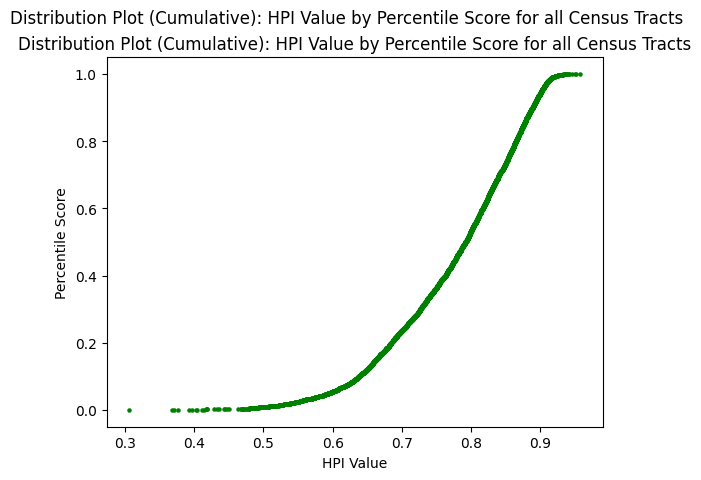

In [18]:
# Visual - Original Distribution Curve (not used)

# val_by_percentile = plt.scatter(voter_data['value'],voter_data['percentile'], c='green', s=5)
# val_by_percentile = plt.xlabel('HPI Value')
# val_by_percentile = plt.ylabel('Percentile Score')
# val_by_percentile = plt.title('Distribution Plot (Cumulative): HPI Value by Percentile Score for all Census Tracts')
# val_by_percentile = plt.suptitle('Distribution Plot (Cumulative): HPI Value by Percentile Score for all Census Tracts')


# plt.show(val_by_percentile)
# plt.savefig('Distribution Plot (Cumulative)- HPI Value by Percentile Score for all Census Tracts.pdf') 

In [11]:
three_set_join = three_set_join[three_set_join['Vaccine Quartile'] !='Unknown']
val_by_percentile = px.scatter(three_set_join, x='value', y='percentile', color='Vaccine Quartile', title='Distribution Plot (Cumulative): HPI Value by HPI Percentile Score for all Census Tracts<br><sup>This plot shows the directly proportional relationship between the HPI quartile and census tracts wich are measured against their assigned HPI Percentile (ie.Score).<br>This chart is merely to prove the correlation between the two categories.')
val_by_percentile.show()

# main_trend = px.scatter(sdhpi_vaccine_join, x='vaccination_percentage_all', y='voting_pctile', color='gis_hpi_quartile_sd', title='Visual for Vaccination Percentage by Voting Percentile')
# main_trend.show()
# main_trend.write_image('Vaccination Percentage by Voting Percentile.pdf', engine='kaleido', format='pdf')

In [ ]:
import pandas as pd
import matplotlib
from pylab import title, figure, xlabel, ylabel, xticks, bar, legend, axis, savefig
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 26)
pdf.cell(40, 10, 'Hello World!')
pdf.cell(50, 20, 'DSCI')

pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(40, 10, 'Hello World!')
pdf.output('510 Final Project Visuals.pdf', 'F')


# pdf = FPDF()
# pdf.add_page()
# pdf.set_font('Arial', 'B', 16)
# pdf.cell(40, 10, 'Hello World!')


''